<a href="https://colab.research.google.com/github/PvrpleJade/AIDA-2/blob/main/Lab_Correlation_and_Autocorrelation_AIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
movie_data = pd.read_csv(r'movie_metadata_cleaned.csv', encoding="gbk")

In [ ]:
movie_data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar聽,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End聽,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Spectre聽,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,The Dark Knight Rises聽,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,Star Wars: Episode VII - The Force Awakens聽 ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,The Following聽,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0
5040,5040,A Plague So Pleasant聽,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0
5041,5041,Shanghai Calling聽,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0
5042,5042,My Date with Drew聽,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0


In [ ]:
movie_data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar聽,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End聽,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Spectre聽,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,The Dark Knight Rises聽,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,Star Wars: Episode VII - The Force Awakens聽 ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


In [ ]:
gross = movie_data["gross"]
budget = movie_data["budget"]

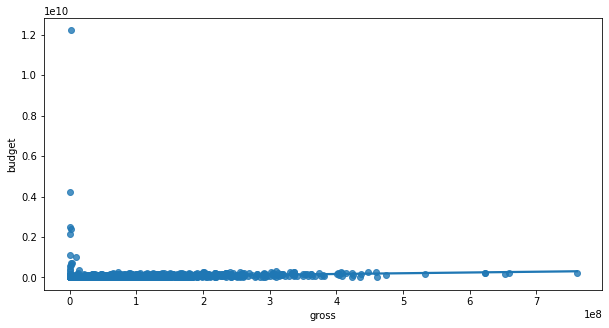

In [ ]:
correlation = gross.corr(budget)
sns.regplot(x=movie_data["gross"], y=movie_data["budget"])

Text(0.5, 1.0, 'Movie Gross')

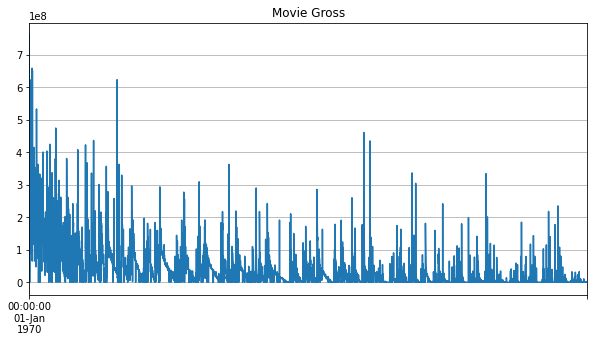

In [ ]:
gross.plot(grid=True);
plt.title("Movie Gross")

Text(0.5, 1.0, 'Budget of te movies')

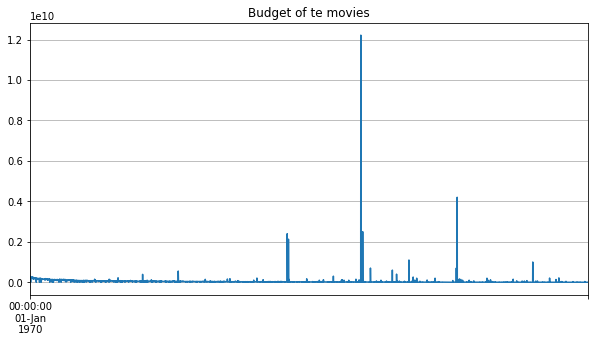

In [ ]:
budget.plot(grid=True);
plt.title("Budget of te movies")

In [ ]:
import statsmodels.api as sm
import math

correlation = gross.corr(budget)
print("The correlation between the two  is ","{:.2f}".format(correlation),"%")
print("\n")
print("\n")
dfx = pd.DataFrame(gross, columns=['gross'])
dfx1 = sm.add_constant(dfx)
result = sm.OLS(budget, dfx1).fit()

print(result.summary())

The correlation between the two  is  0.12 %




                            OLS Regression Results                            
Dep. Variable:                 budget   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     78.12
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.32e-18
Time:                        11:41:11   Log-Likelihood:            -1.0343e+05
No. Observations:                5044   AIC:                         2.069e+05
Df Residuals:                    5042   BIC:                         2.069e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, '2012 Movie Popularity')

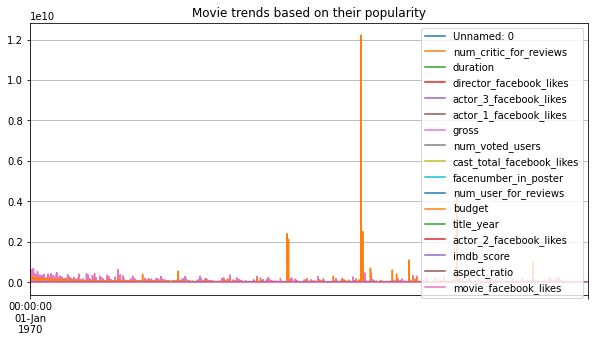

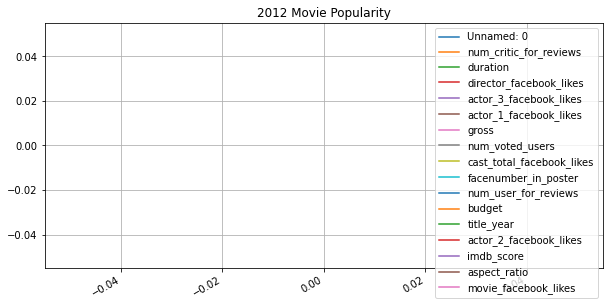

In [ ]:
movie_data.index = pd.to_datetime(movie_data.index)
movie_data.plot(grid=True);
plt.title("Movie trends based on their popularity")
movie_data2012 = movie_data[movie_data.index.year == 2012]
movie_data2012.plot(grid=True);
plt.title("2012 Movie Popularity")